## Linear Regression 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
plt.style.use("seaborn-whitegrid")

#### Load your data sets

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### EDA 

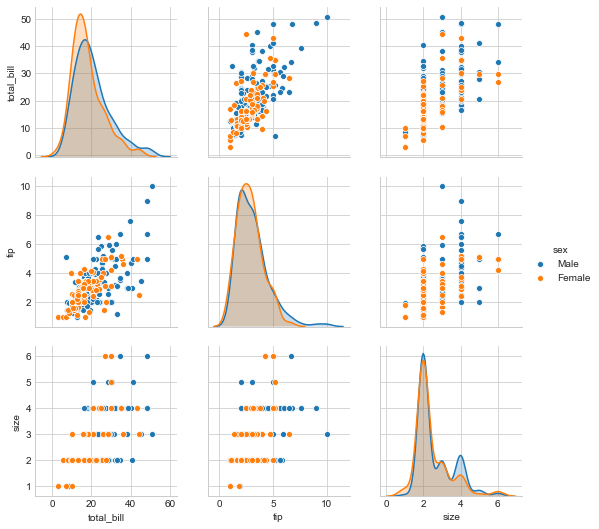

In [7]:
sns.pairplot(tips,'sex')
plt.show()

### Linear Regression $ y = \beta_0 + \beta_1 X $

#### where X is Feature which is independent and y is target to be predicted which depends on X and $ \beta_0 $ is known intercept and $ \beta_1 $ is known as coefficient 


### here X --> total_bill ( feature )
### here Y --> tip ( target ) 

### Step2 --> split your data into Training and Testing Data set 

In [8]:
f1 = tips['total_bill']
f2 = tips[['total_bill']]

In [10]:
features = tips[['total_bill']]
target = tips['tip']

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
#help(train_test_split)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
         features, target, test_size=0.33, random_state=42)

In [15]:
len(X_train)

163

In [16]:
len(X_test)

81

In [17]:
X_train.head()

,total_bill
114,25.71
65,20.08
132,11.17
207,38.73
162,16.21


In [19]:
y_train.head()

114    4.00
65     3.15
132    1.50
207    3.00
162    2.00
Name: tip, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin = LinearRegression() # creating a model 

### Step 3 Trained your model or fitting data to model

In [22]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### here is our intercept $\beta_0$

In [23]:
lin.intercept_

0.8207989142570451

#### here is our coefficient $ \beta_1$

In [24]:
lin.coef_

array([0.112207])

#### lets find pridicted values of y as $\hat y$

In [26]:
y_pred = lin.predict(X_test)

In [28]:
y_pred[:5]

array([3.0447416 , 1.80485428, 3.5754807 , 3.72583807, 2.27948988])

In [32]:
np.array(X_test[:5])[:,0]

array([19.82,  8.77, 24.55, 25.89, 13.  ])

In [35]:
np.array(y_test[:5])

array([3.18, 2.  , 2.  , 5.16, 2.  ])

### Model Evaluation 

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mean_squared_error(y_test,y_pred)

0.7795244566068924

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test,y_pred)

0.39917422434566985

### Visulations 

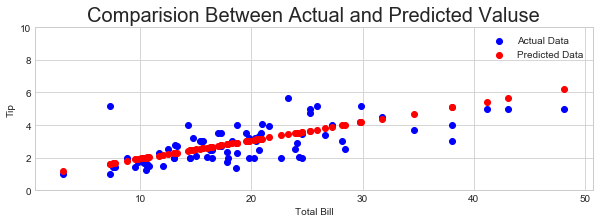

In [46]:
plt.figure(figsize=(10,3))
plt.title("Comparision Between Actual and Predicted Valuse",fontsize=20)
plt.scatter(X_test,y_test,c='b',label="Actual Data")
plt.scatter(X_test,y_pred,c='r',label="Predicted Data")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.ylim([0,10])
plt.show()


!ls C:\\Users\\hp\\Desktop\\ISLR_DATASET

In [51]:
df = pd.read_csv("C://Users//hp//Desktop//ISLR_DATASET/Income2.csv",
                index_col=0)

In [52]:
df.head()

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922


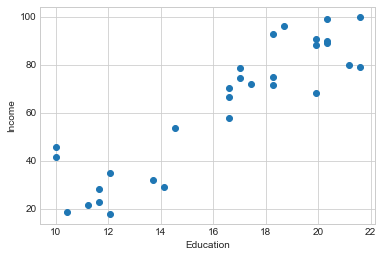

In [54]:
plt.scatter(df['Education'],df['Income'])
plt.xlabel("Education")
plt.ylabel("Income")
plt.show()

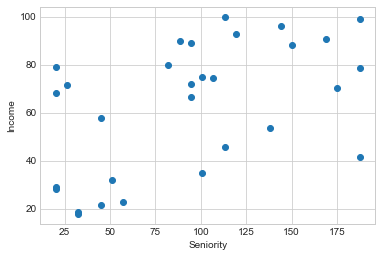

In [55]:
plt.scatter(df['Seniority'],df['Income'])
plt.xlabel("Seniority")
plt.ylabel("Income")
plt.show()

In [56]:
model = LinearRegression()
model.fit(df[["Seniority","Education"]],df['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
pred = model.predict(df[["Seniority","Education"]])

In [61]:
pred.shape

(30,)

In [60]:
r2_score(df['Income'],pred) # Biasing

0.9341035446679531

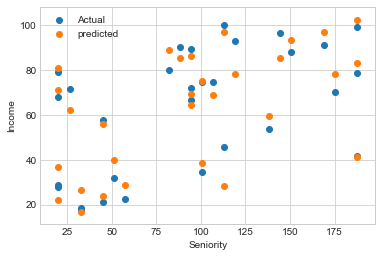

In [63]:
plt.scatter(df['Seniority'],df['Income'],label="Actual")
plt.scatter(df["Seniority"],pred,label="predicted")
plt.xlabel("Seniority")
plt.ylabel("Income")
plt.legend()
plt.show()

### Boston House Price Predictions

In [65]:
from sklearn.datasets import load_boston

In [66]:
boston = load_boston()

In [67]:
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [68]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [69]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [73]:
features  = pd.DataFrame(boston["data"],columns=boston["feature_names"])
target = pd.Series(boston['target'])

In [72]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Step 1 train test split 

In [74]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,
                                random_state=104)

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
model.coef_

array([-1.16062254e-01,  4.32434540e-02, -1.91175950e-02,  2.47916443e+00,
       -1.79713582e+01,  4.35468356e+00, -9.95586310e-03, -1.41193896e+00,
        3.18032307e-01, -1.38461906e-02, -8.91796253e-01,  9.04443126e-03,
       -4.13970100e-01])

In [78]:
model.intercept_

32.00591598067646

In [79]:
pred = model.predict(X_test)

In [80]:
r2_score(y_test,pred)

0.6949668489190102

In [81]:
mean_squared_error(y_test,pred)

24.75674812469616

### Iris Data set 

In [83]:
from sklearn.datasets import load_iris

In [84]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [85]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [86]:
features = pd.DataFrame(iris['data'],columns=iris['feature_names'])
target = pd.Series(iris['target'])

In [87]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
target.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [90]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [91]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,
                                random_state=104)

In [92]:
model = LinearRegression()
model.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
pred = model.predict(features)

In [94]:
target[:5]

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [95]:
pred[:5]

array([-0.08254936, -0.04012845, -0.04862768,  0.01229986, -0.07536672])

In [96]:
r2_score(target,pred)

0.9303939218549564

In [97]:
df = pd.read_csv("C://Users//hp//Desktop//ISLR_DATASET/Advertising.csv",
                index_col=0)

In [98]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
